## 선형 회귀 분석 

In [8]:

import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


In [1]:

# 데이터 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
price = raw_df.values[1::2, 2]
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
1,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24.0,666.0,20.2,319.98,15.70
2,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
3,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15
4,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35


In [2]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [3]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])


**Variables in order:**  
- CRI M:     per capita crime rate by town  
- ZN :       proportion of residential land zoned for lots over 25,000 sq.ft.  
- INDUS :    proportion of non-retail business acres per town  
- CHAS :     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- NOX :      nitric oxides concentration (parts per 10 million)  
- RM :       average number of rooms per dwelling  
- AGE :      proportion of owner-occupied units built prior to 1940  
- DIS :      weighted distances to five Boston employment centres  
- RAD :      index of accessibility to radial highways  
- TAX :      full-value property-tax rate per 10,000 dollor  
- PTRATIO :  pupil-teacher ratio by town  
- B :        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town    
- LSTAT :    % lower status of the population    
- MEDV :     Median value of owner-occupied homes in $1000's      

- CRIM: 도시별 1인당 범죄율  
- ZN: 25,000평방피트 이상의 부지로 지정된 주거용 토지의 비율.  
- INDUS: 마을별 비소매업 면적 비율  
- CHAS :     찰스 강 더미 변수(지역이 강을 경계로 하는 경우 = 1, 그렇지 않은 경우 0)  
- NOX: 산화질소 농도(천만 분의 1)  
- RM : 주거지당 평균 방 수  
- AGE: 1940년 이전에 지어진 소유주 거주 유닛의 비율  
- DIS : 보스턴의 5개 고용 센터까지의 가중치 거리  
- RAD : 방사형 고속도로 접근성 지수  
- TAX : 10,000달러당 전체 가치 재산세율  
- PTRATIO : 마을별 학생 대 교사 비율  
- B : 1000(Bk - 0.63)^2 여기서 Bk는 마을별 흑인 비율입니다.    
- LSTAT : 인구의 하위 상태 비율    
- MEDV : 소유주가 거주하는 주택의 중간값($1000대)  

In [6]:
x_train

array([[6.37960e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.80020e+02, 1.02600e+01],
       [7.02259e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.19980e+02, 1.57000e+01],
       [1.05393e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.86850e+02, 6.58000e+00],
       ...,
       [1.96570e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
        3.76140e+02, 1.01500e+01],
       [2.76300e-02, 7.50000e+01, 2.95000e+00, ..., 1.83000e+01,
        3.95630e+02, 4.32000e+00],
       [8.20058e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.50000e+00, 1.69400e+01]])

In [7]:
y_train

array([18.2, 14.2, 23.1, 18.7, 13.1, 32.2, 22. , 22. , 21.2, 15.2, 18.2,
       50. , 15.6, 35.4, 14.4, 19.9, 15. , 29.6,  8.1, 28.7, 36. ,  8.3,
       20.2, 20.5, 17.8,  5. , 20.3, 22. , 36.4, 18.5, 18.4,  8.7, 15. ,
       33.1, 25. , 23.2, 44. , 24.8, 32.5, 33. , 23.8,  6.3, 18.2, 18.3,
       11.3, 12.6, 15.2, 10.9, 19.4,  9.7, 22.2, 30.1, 20.4, 15.4, 30.3,
       22.7, 50. ,  8.5, 23.1, 28.4, 24.4, 18.4, 21.4, 25. , 21.9, 27.5,
       11. ,  8.8, 22.5, 24.4, 43.8, 19.4, 28.7, 22.6, 43.5, 21.7, 17.8,
       26.2,  7.5, 20.1, 37.9, 14.1, 17.5, 21.9, 33.8, 23.3, 23.7, 22.9,
       21.8, 18.1, 22.8, 19.8, 13.4, 24.5, 22.3, 14.9, 31.6, 16. , 37. ,
       22. , 16.7, 13.4, 12.8, 29.8, 20.5, 13.9, 48.5, 14.8, 35.4, 20.9,
        8.4,  7.4, 15.1, 10.5, 14.6, 27.9, 14.4, 15.4, 14.5, 27.1, 20. ,
       27.5, 19.5, 15.2, 16.1, 15.3, 24.7, 17. , 29.9, 41.3, 23.6, 23.8,
       21.1, 16.5, 21.7, 26.6, 16.1, 33.4, 11.9, 17.1, 28.2, 31.2, 19.4,
       15.6, 28.7, 20.6, 13.5, 50. , 34.9, 18.8, 28

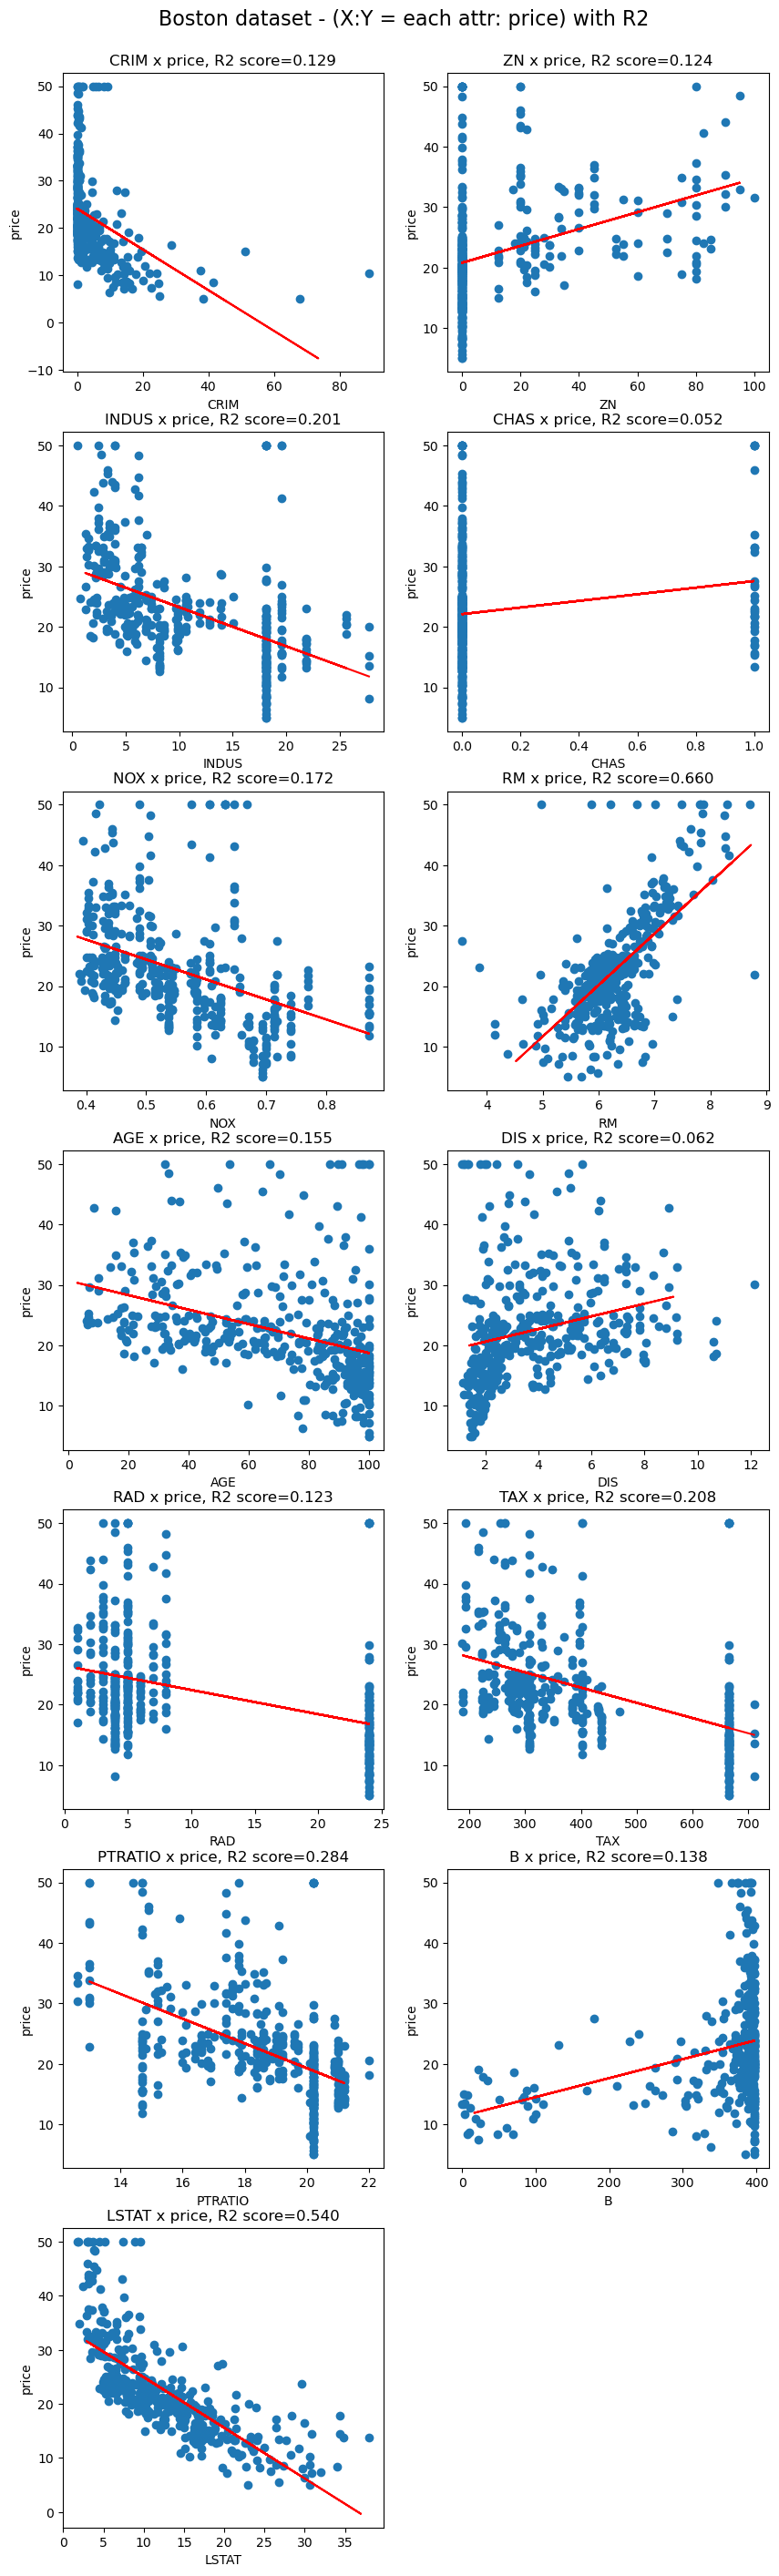

In [9]:

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(x_train.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.
    # data는 전체 데이터셋입니다. 우리가 확인하고 싶은 건 trainset으로 훈련하고, testset으로 확인하는거죠!
    # 따라서 학습에 사용할 trainset, 예측과 평가에 사용할 testset은 따로 분리해야 할 것 같습니다.
    # single attr: trainset, test_attr: testset
    # 따라서 dataset이 아닌 x_train의 컬럼 데이터들을 불러와서 single attr에 넣어주면 좋을 것 같습니다.
    single_attr, attr_name = x_train[:, i].reshape(-1, 1), df.columns[i] # trainset, 컬럼명
    test_attr = x_test[:, i].reshape(-1, 1)# testset

    estimator = LinearRegression()
    estimator.fit(single_attr, y_train) #모델의 학습은 trainset으로 해야하기 때문에 x_train, y_train으로 학습하면 좋을 것 같습니다.

    pred_price = estimator.predict(test_attr)# predict 작업은 x_test로 하면 좋을 것 같습니다!
    score = metrics.r2_score(y_test, pred_price) # score도 test y값과 모델이 예측한 y값으로!!

    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, y_train) # trainset에 대한 산포도
    ax.plot(test_attr, pred_price, color='red') # 우리 모델이 그린 추세선을 확인하고 싶은 거면 testset으로 하면 좋을 것 같아요.
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축